In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels
import statsmodels.api as sm
import sklearn

In [2]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='Newspaper', ylabel='Sales'>

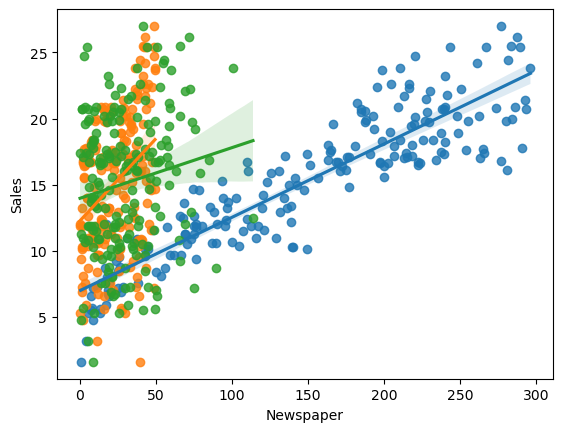

In [6]:
sns.regplot(x = 'TV', y = 'Sales', data=advertising)
sns.regplot(x = 'Radio', y = 'Sales', data=advertising)
sns.regplot(x = 'Newspaper', y = 'Sales', data=advertising)

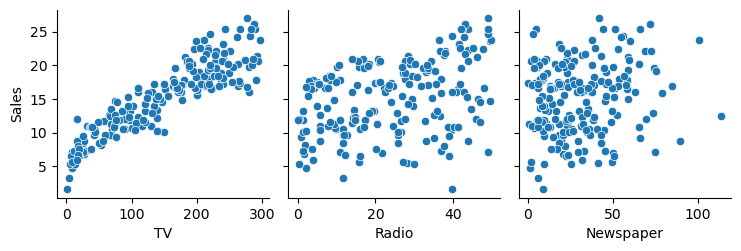

In [7]:
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars=['Sales'], kind='scatter')

In [8]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

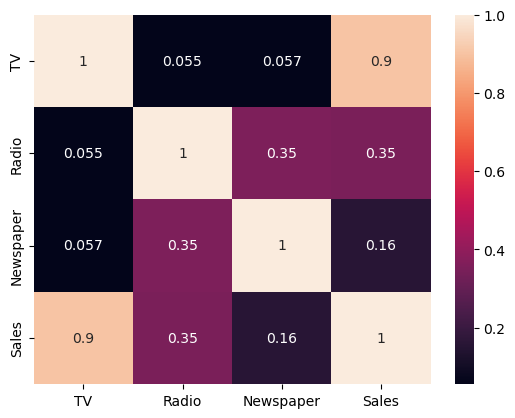

In [9]:
sns.heatmap(advertising.corr(), annot=True)

In [10]:
X = advertising['TV']
y = advertising['Sales']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [19]:
X_train.shape

(140,)

In [20]:
X_test.shape

(60,)

### Linear Regression using stats model

In [21]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [22]:
'''
    y = mx + c
For stats model,
    y = mx + c*const
'''

'\ny = mx + c\nFor stats model,\ny = mx + c*const\n'

In [23]:
#Ordinary Least Squares
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [24]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [25]:
# Sales = 6.94 + 0.05*TV

In [26]:
#R-squared -> 0.816, 81% of the variance in sales is explained by TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        00:24:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

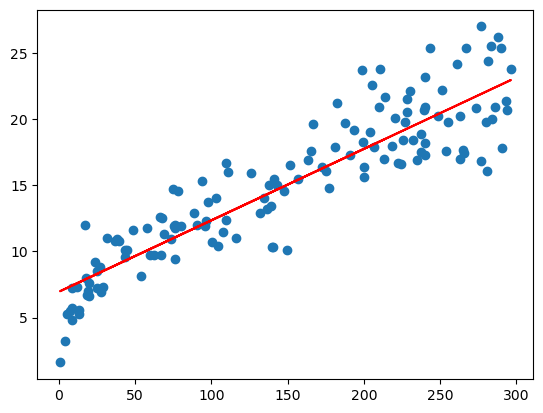

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')

In [ ]:
'''
Residual Analysis

    error = f(y_train, y_train_pred)
    y_train -> the actual sales values
    y_train_pred -> the values predicted by the model
    error = y_train - y_train_pred
'''

In [30]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

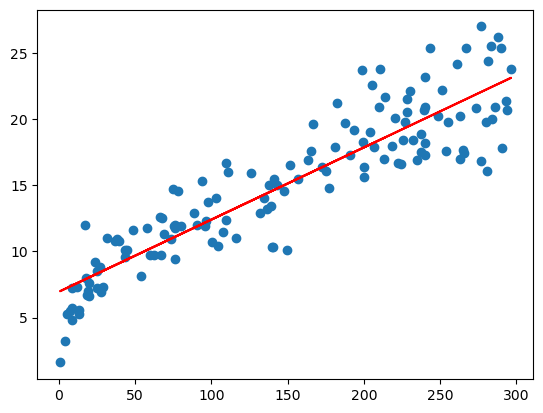

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')

In [32]:
res = y_train - y_train_pred

/var/folders/5k/zv5thkbd1cvg39zpcv0jgt400000gn/T/ipykernel_5479/3718818392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual plot')

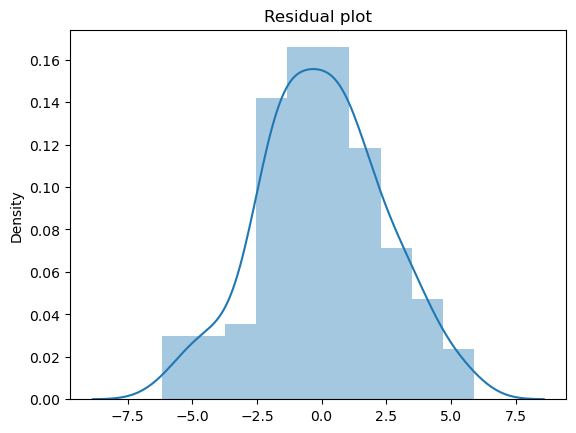

In [33]:
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

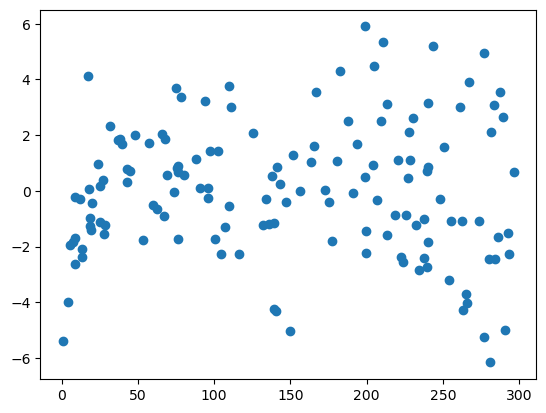

In [35]:
# look for patterns in residuals (we should not able to identify any patterns)
plt.scatter(X_train, res)

In [36]:
# making predictions and evaluating on the test set

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
#r-squared -> what you have predicted/ what actually is
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7921031601245658

In [41]:
r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)
r2_train

0.8157933136480389

In [44]:
# mean squared error
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826956

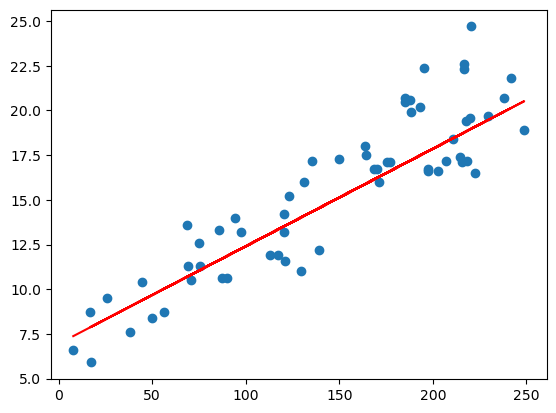

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')

### Linear Regression using sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [16]:
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [17]:
# steps in sklearn model building

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [19]:
# 3. see the params, make predictions (train, test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001362


In [20]:
# make predictions

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [22]:
# 4. evaluate (r2)
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480388
0.792103160124566
